In [6]:
import os, shutil

In [7]:


train_datadir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\dogs-vs-cats\\train\\train'


base_dir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)



In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
#Check




In [9]:
print('Cat training images:',len(os.listdir(train_cats_dir)))
print('Dogs training images:',len(os.listdir(train_dogs_dir)))

print('Cats validation images:',len(os.listdir(validation_cats_dir)))


Cat training images: 1000
Dogs training images: 1000
Cats validation images: 500


In [10]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [13]:
# Data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
for data_batch , label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape: ',label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape:  (20,)


In [15]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data= validation_generator,
                             validation_steps=50)

Epoch 1/30


W0904 12:56:58.765020  3064 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100/100 [==============================] - 112s 1s/step - loss: 0.6860 - acc: 0.5340 - val_loss: 0.6712 - val_acc: 0.5590
Epoch 2/30
100/100 [==============================] - 111s 1s/step - loss: 0.6585 - acc: 0.6130 - val_loss: 0.6419 - val_acc: 0.6340
Epoch 3/30
100/100 [==============================] - 110s 1s/step - loss: 0.6162 - acc: 0.6690 - val_loss: 0.6163 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.5803 - acc: 0.6965 - val_loss: 0.5988 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5383 - acc: 0.7355 - val_loss: 0.5832 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 110s 1s/step - loss: 0.5075 - acc: 0.7510 - val_loss: 0.5544 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.4858 - acc: 0.7570 - val_loss: 0.5401 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 110s 1s/step - loss: 0.452

In [16]:
#model.save('cats_and_dogs_1.h5')

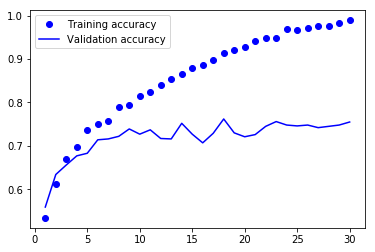

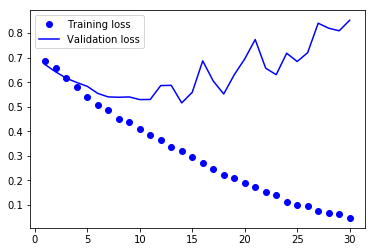

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()
plt.show()

In [19]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
) 

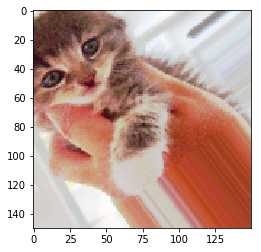

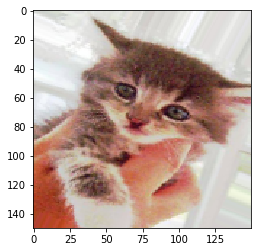

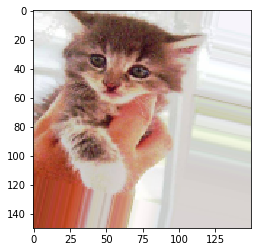

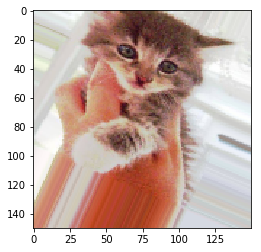

In [22]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
    

In [26]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer= keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')
history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
10/10 [==============================] - 26s 3s/step - loss: 0.5839 - acc: 0.7094 - val_loss: 0.6602 - val_acc: 0.6326
Epoch 2/100
10/10 [==============================] - 25s 3s/step - loss: 0.5980 - acc: 0.6687 - val_loss: 0.5683 - val_acc: 0.7049
Epoch 3/100
10/10 [==============================] - 25s 2s/step - loss: 0.6236 - acc: 0.6594 - val_loss: 0.5916 - val_acc: 0.6796
Epoch 4/100
10/10 [==============================] - 25s 2s/step - loss: 0.5842 - acc: 0.6938 - val_loss: 0.6000 - val_acc: 0.6662
Epoch 5/100
10/10 [==============================] - 25s 2s/step - loss: 0.6260 - acc: 0.6579 - val_loss: 0.5600 - val_acc: 0.6999
Epoch 6/100
10/10 [==============================] - 24s 2s/step - loss: 0.5660 - acc: 0.7031 - val_loss: 0.5743 - val_acc: 0.6846
Epoch 7/100
10/10 [==============================] - 25s 3s/step - loss: 0.5436 - acc: 0.7105 - val_loss: 0.6300 - val_acc: 0.6643

10/10 [==============================] - 25s 3s/step - loss: 0.5609 - acc: 0.6812 - val_loss: 0.5143 - val_acc: 0.7310
Epoch 63/100
10/10 [==============================] - 25s 2s/step - loss: 0.5544 - acc: 0.7125 - val_loss: 0.5993 - val_acc: 0.6656
Epoch 64/100
10/10 [==============================] - 25s 2s/step - loss: 0.5562 - acc: 0.7000 - val_loss: 0.5124 - val_acc: 0.7437
Epoch 65/100
10/10 [==============================] - 25s 2s/step - loss: 0.5280 - acc: 0.7281 - val_loss: 0.5135 - val_acc: 0.7360
Epoch 66/100
10/10 [==============================] - 25s 2s/step - loss: 0.5320 - acc: 0.7250 - val_loss: 0.5034 - val_acc: 0.7379
Epoch 67/100
10/10 [==============================] - 25s 2s/step - loss: 0.5724 - acc: 0.7312 - val_loss: 0.5633 - val_acc: 0.7145
Epoch 68/100
10/10 [==============================] - 25s 2s/step - loss: 0.5567 - acc: 0.6844 - val_loss: 0.5329 - val_acc: 0.7157
Epoch 69/100
10/10 [==============================] - 24s 2s/step - loss: 0.5416 - acc: 0

# Pretrained Convnet


In [34]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 134s 2us/step


In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [41]:
model = tf.keras.Sequential([
    conv_base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
conv_base.trainable = False

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
10/10 [==============================] - 239s 24s/step - loss: 0.7123 - acc: 0.6400 - val_loss: 0.5368 - val_acc: 0.7720
Epoch 2/30
10/10 [==============================] - 187s 19s/step - loss: 0.6034 - acc: 0.6550 - val_loss: 0.5226 - val_acc: 0.6900
Epoch 3/30
10/10 [==============================] - 125s 12s/step - loss: 0.5310 - acc: 0.7500 - val_loss: 0.4360 - val_acc: 0.8140
Epoch 4/30
10/10 [==============================] - 126s 13s/step - loss: 0.4886 - acc: 0.7650 - val_loss: 0.5948 - val_acc: 0.6340
Epoch 5/30
10/10 [==============================] - 133s 13s/step - loss: 0.4405 - acc: 0.7950 - val_loss: 0.4605 - val_acc: 0.7740
Epoch 6/30
10/10 [==============================] - 152s 15s/step - loss: 0.5014 - acc: 0.7700 - val_loss: 0.3553 - val_acc: 0.8550
Epoch 7/30
10/10 [==============================] - 157s 16s/step - loss: 0.4727 - acc: 0.7750 - val_loss: 0.4178 - val_acc: